# Predicting Operational Efficiency of Manufacturing Teams - Finishing & Quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('manufacturing_data.csv')

In [3]:
df['productionDept'] = df['productionDept'].str.strip()

In [4]:
print(df['productionDept'].value_counts())

productionDept
Stitching Unit         691
Finishing & Quality    506
Name: count, dtype: int64


### Split the DataFrames

In [5]:
finishing_df = df[df['productionDept'] == "Finishing & Quality"].copy()

In [6]:
# Drop the workInProgress column since it has only NaN values
finishing_df = finishing_df.drop(columns=['workInProgress'])

In [7]:
finishing_df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,960,0,0.0,0,No Style Change,8.0,0.667604
6,2/26/2015,Q4,Finishing & Quality,Thursday,Line-S1,0.5,3.94,3360,0,0.0,0,No Style Change,8.0,0.768847
7,2/28/2015,Q4,Finishing & Quality,Saturday,Line-S1,0.5,3.94,3360,0,0.0,0,No Style Change,8.0,0.768847


In [8]:
finishing_df.tail()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
1190,1/27/2015,Q4,Finishing & Quality,Tuesday,Line-C1,0.5,4.15,960,0,0.0,0,No Style Change,8.0,0.803542
1192,3/3/2015,Q1,Finishing & Quality,Tuesday,Line-F2,0.7,4.60,3360,0,0.0,0,No Style Change,8.0,0.354444
1193,3/7/2015,Q1,Finishing & Quality,Saturday,Line-F3,0.5,2.90,960,0,0.0,0,No Style Change,8.0,0.797500
1194,3/9/2015,Q2,Finishing & Quality,Monday,Line-F2,0.6,3.94,0,2880,0.0,0,No Style Change,12.0,0.864343
1196,3/8/2015,Q2,Finishing & Quality,Sunday,Line-Q2,0.7,2.90,960,0,0.0,0,No Style Change,8.0,0.441042


In [9]:
finishing_df.shape

(506, 14)

In [10]:
print(finishing_df['productionDept'].value_counts())

productionDept
Finishing & Quality    506
Name: count, dtype: int64


In [11]:
finishing_df.isnull().sum()

recordDate             0
fiscalQuarter          0
productionDept         0
dayOfWeek              0
team                   0
plannedEfficiency      0
standardMinuteValue    0
overtimeMinutes        0
performanceBonus       0
idleMinutes            0
idleWorkers            0
styleChangeCount       0
workerCount            0
efficiencyScore        0
dtype: int64

In [12]:
finishing_df.describe()

,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,506.000000,506.000000,506.000000,506.000000,506.0,506.0,506.000000,506.000000
mean,0.737352,3.887036,1917.154150,29.644269,0.0,0.0,10.252964,0.752951
std,0.091512,0.594110,1776.698408,244.130042,0.0,0.0,4.007819,0.197021
min,0.350000,2.900000,0.000000,0.000000,0.0,0.0,2.000000,0.235795
25%,0.700000,3.900000,960.000000,0.000000,0.0,0.0,8.000000,0.631606
50%,0.750000,3.940000,1440.000000,0.000000,0.0,0.0,8.000000,0.805909
75%,0.800000,4.150000,1920.000000,0.000000,0.0,0.0,11.750000,0.906364
max,0.800000,5.130000,15000.000000,3600.000000,0.0,0.0,28.000000,1.120437


In [13]:
finishing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 2 to 1196
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           506 non-null    object 
 1   fiscalQuarter        506 non-null    object 
 2   productionDept       506 non-null    object 
 3   dayOfWeek            506 non-null    object 
 4   team                 506 non-null    object 
 5   plannedEfficiency    506 non-null    float64
 6   standardMinuteValue  506 non-null    float64
 7   overtimeMinutes      506 non-null    int64  
 8   performanceBonus     506 non-null    int64  
 9   idleMinutes          506 non-null    float64
 10  idleWorkers          506 non-null    int64  
 11  styleChangeCount     506 non-null    object 
 12  workerCount          506 non-null    float64
 13  efficiencyScore      506 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 59.3+ KB


## Data Preprocessing

#### Extract month from recordDate and drop recordDate: Since all years are the same and the exact date is not meaningful, we will extract the month from the recordDate column to provide temporal context, then drop the original date column.

In [14]:
finishing_df['month'] = pd.to_datetime(finishing_df['recordDate']).dt.month

#### Drop fiscalQuarter: The fiscalQuarter column contains values from Q1 to Q5, but the records cover only three months, making these quarter assignments unreliable or irrelevant for modeling.
#### Drop productionDept: Each subset (Stitching or Finishing) contains only one unique value for productionDept, so it does not provide any discriminative information.

In [15]:
finishing_df = finishing_df.drop(columns=['fiscalQuarter', 'productionDept', 'recordDate'])

#### Lable encoded teams: No. of teams is large and have many different values.

In [16]:
from sklearn.preprocessing import LabelEncoder

finishing_df['team_enc'] = LabelEncoder().fit_transform(finishing_df['team'])

In [17]:
finishing_df[['team', 'team_enc']].head()

,team,team_enc
2,Line-C2,1
3,Line-S2,10
4,Line-C1,0
6,Line-S1,9
7,Line-S1,9


In [18]:
finishing_df['styleChangeCount'].value_counts()

styleChangeCount
No Style Change    506
Name: count, dtype: int64

#### One-Hot Encode dayOfWeek and styleChangeCount
#### Why?
#### These columns are categorical with no “order” one-hot encoding is the best way for most ML models to use them.
#### This will create a new column for each unique value in these categories, with a 1 where that value is present and 0 elsewhere.

In [19]:
finishing_df = pd.get_dummies(
    finishing_df, 
    columns=['dayOfWeek', 'styleChangeCount'],
    prefix=['day', 'style'],
    drop_first=True
)

In [20]:
finishing_df.head()

,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore,month,team_enc,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
2,Line-C2,0.8,2.90,1440,0,0.0,0,8.0,0.681061,1,1,False,False,False,True,False
3,Line-S2,0.7,3.90,960,0,0.0,0,8.0,0.325000,2,10,False,False,False,True,False
4,Line-C1,0.8,2.90,960,0,0.0,0,8.0,0.667604,1,0,False,True,False,False,False
6,Line-S1,0.5,3.94,3360,0,0.0,0,8.0,0.768847,2,9,False,False,True,False,False
7,Line-S1,0.5,3.94,3360,0,0.0,0,8.0,0.768847,2,9,True,False,False,False,False


In [21]:
finishing_df.shape

(506, 16)

#### No subset column was printed for styleChangeCount because it has only one unique value (e.g., all "No Style Change"), pd.get_dummies() will not create any columns for it (or only one, which is dropped if drop_first=True). 

In [22]:
finishing_df.describe()

,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore,month,team_enc
count,506.000000,506.000000,506.000000,506.000000,506.0,506.0,506.000000,506.000000,506.000000,506.000000
mean,0.737352,3.887036,1917.154150,29.644269,0.0,0.0,10.252964,0.752951,1.727273,5.551383
std,0.091512,0.594110,1776.698408,244.130042,0.0,0.0,4.007819,0.197021,0.763478,3.541875
min,0.350000,2.900000,0.000000,0.000000,0.0,0.0,2.000000,0.235795,1.000000,0.000000
25%,0.700000,3.900000,960.000000,0.000000,0.0,0.0,8.000000,0.631606,1.000000,2.000000
50%,0.750000,3.940000,1440.000000,0.000000,0.0,0.0,8.000000,0.805909,2.000000,6.000000
75%,0.800000,4.150000,1920.000000,0.000000,0.0,0.0,11.750000,0.906364,2.000000,9.000000
max,0.800000,5.130000,15000.000000,3600.000000,0.0,0.0,28.000000,1.120437,3.000000,11.000000


### Adding New Features

In [23]:
finishing_df['efficiencyPerWorker'] = finishing_df['efficiencyScore'] / finishing_df['workerCount']
finishing_df['bonusPerWorker'] = finishing_df['performanceBonus'] / finishing_df['workerCount']
print(finishing_df[['efficiencyPerWorker', 'bonusPerWorker']].describe())

       efficiencyPerWorker  bonusPerWorker
count           506.000000      506.000000
mean              0.082271        2.845850
std               0.046159       21.168909
min               0.014352        0.000000
25%               0.057704        0.000000
50%               0.080056        0.000000
75%               0.099218        0.000000
max               0.485933      240.000000


### Feature Scaling (Min Max Scaling)

In [24]:
from sklearn.preprocessing import MinMaxScaler

minmax_features = ['standardMinuteValue', 'overtimeMinutes', 'performanceBonus', 'workerCount', 'efficiencyScore', 'month']

scaler_finish = MinMaxScaler()
finishing_df[minmax_features] = scaler_finish.fit_transform(finishing_df[minmax_features])

finishing_df[minmax_features].describe()

,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,month
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.442617,0.127810,0.008235,0.317422,0.584593,0.363636
std,0.266417,0.118447,0.067814,0.154147,0.222713,0.381739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448430,0.064000,0.000000,0.230769,0.447424,0.000000
50%,0.466368,0.096000,0.000000,0.230769,0.644457,0.500000
75%,0.560538,0.128000,0.000000,0.375000,0.758011,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Select Features and Prepare Train/Test Data

In [25]:
from sklearn.model_selection import train_test_split

features = [
    'plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'performanceBonus',
    'workerCount', 'month', 'team_enc', 'day_Saturday', 'day_Sunday', 'day_Thursday',
    'day_Tuesday', 'day_Wednesday'
]
target = 'efficiencyScore'

X_finish = finishing_df[features]
y_finish = finishing_df[target]

X_train_finish, X_test_finish, y_train_finish, y_test_finish = train_test_split(
    X_finish, y_finish, test_size=0.2, random_state=42
)

print("Finishing shapes:", X_train_finish.shape, X_test_finish.shape)

Finishing shapes: (404, 12) (102, 12)


## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train
lr_finish = LinearRegression()
lr_finish.fit(X_train_finish, y_train_finish)

# Predict
y_pred_finish = lr_finish.predict(X_test_finish)

# Evaluate
print("Finishing - Linear Regression")
print("R^2:", r2_score(y_test_finish, y_pred_finish))
print("MSE:", mean_squared_error(y_test_finish, y_pred_finish))
print("MAE:", mean_absolute_error(y_test_finish, y_pred_finish))

Finishing - Linear Regression
R^2: 0.24598247777859228
MSE: 0.03447849269394912
MAE: 0.14406394553777438


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_finish = RandomForestRegressor(random_state=42)
rf_finish.fit(X_train_finish, y_train_finish)

y_pred_finish_rf = rf_finish.predict(X_test_finish)

print("Finishing - Random Forest")
print("R^2:", r2_score(y_test_finish, y_pred_finish_rf))
print("MSE:", mean_squared_error(y_test_finish, y_pred_finish_rf))
print("MAE:", mean_absolute_error(y_test_finish, y_pred_finish_rf))

Finishing - Random Forest
R^2: 0.2049083049531486
MSE: 0.036356665980293815
MAE: 0.14154802349534684


## Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

gb_finish = GradientBoostingRegressor(random_state=42)
gb_finish.fit(X_train_finish, y_train_finish)
y_pred_finish_gb = gb_finish.predict(X_test_finish)

print("Finishing - Gradient Boosting")
print("R^2:", r2_score(y_test_finish, y_pred_finish_gb))
print("MSE:", mean_squared_error(y_test_finish, y_pred_finish_gb))
print("MAE:", mean_absolute_error(y_test_finish, y_pred_finish_gb))

Finishing - Gradient Boosting
R^2: 0.30735227798499565
MSE: 0.03167227381217587
MAE: 0.13646412762495638


#### Insights:
##### Overall performance is lower than Stitching, with R² below 0.31 for all models.
##### Gradient Boosting is the best for Finishing, achieving the highest R² (0.31), lowest MSE (0.0317), and lowest MAE (0.1365).
##### Random Forest and Linear Regression perform similarly, but both are outperformed by Gradient Boosting on this dataset.

## Feature Importance for the Best Models

### Finishing: Gradient Boosting

Finishing - Gradient Boosting Feature Importances:
workerCount            0.284730
overtimeMinutes        0.184479
standardMinuteValue    0.158255
team_enc               0.116562
plannedEfficiency      0.090022
month                  0.061316
day_Thursday           0.035813
day_Wednesday          0.023788
day_Saturday           0.018788
day_Sunday             0.017303
day_Tuesday            0.005426
performanceBonus       0.003517
dtype: float64


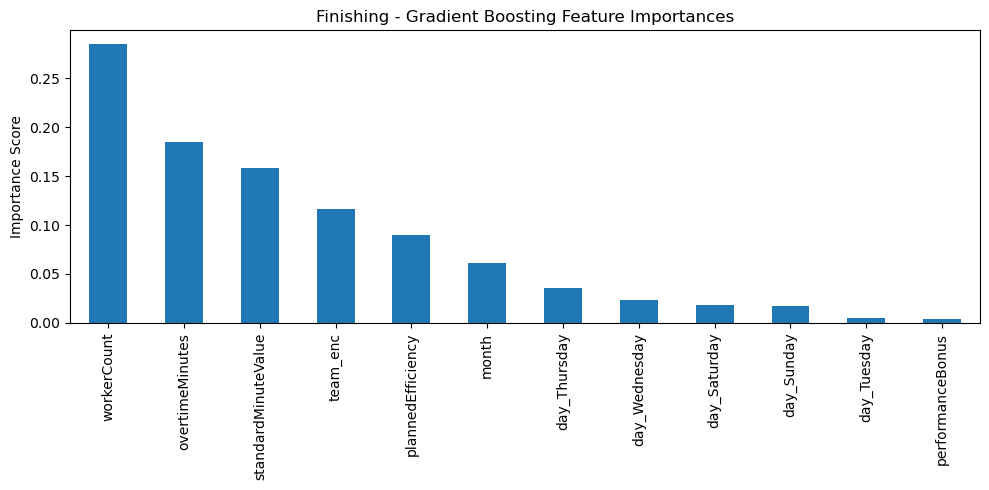

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

gb_importances = pd.Series(gb_finish.feature_importances_, index=X_train_finish.columns).sort_values(ascending=False)

print("Finishing - Gradient Boosting Feature Importances:")
print(gb_importances)

gb_importances.plot(kind='bar', figsize=(10, 5), title='Finishing - Gradient Boosting Feature Importances')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Hyperparameter Tuning (Gradient Boosting)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_gb.fit(X_train_finish, y_train_finish)


y_pred_gb_best = grid_gb.predict(X_test_finish)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Test R² (tuned):", r2_score(y_test_finish, y_pred_gb_best))
print("Test MSE (tuned):", mean_squared_error(y_test_finish, y_pred_gb_best))
print("Test MAE (tuned):", mean_absolute_error(y_test_finish, y_pred_gb_best))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Test R² (tuned): 0.3066225217638775
Test MSE (tuned): 0.03170564292336583
Test MAE (tuned): 0.13307137441825967


In [33]:
print(grid_gb.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
